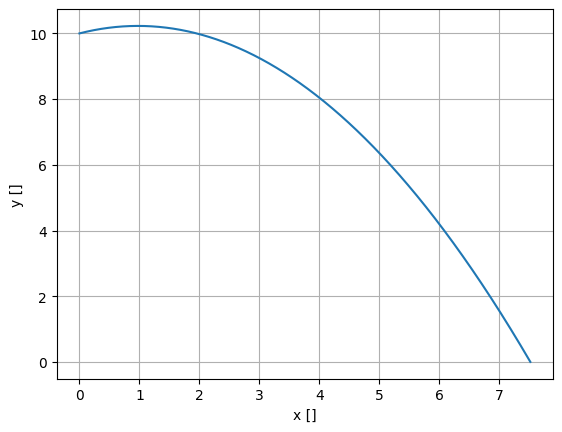

0.0 10.0


In [15]:
import numpy as np
import matplotlib.pyplot as plt

h = 10.0
v_ab = 5.0
alpha = np.radians(25.0)
g = 9.81

r0 = np.array([0,h])
v0 = np.array([v_ab * np.cos(alpha), v_ab * np.sin(alpha)])
a = np.array([0, -g])

#t_e = v0[1] / g + np.sqrt((v0[1] / g) ** 2 + 2 * r0[1] / g)
t_e = v0[1] / g + np.sqrt((v0[1] / g) ** 2 + 2 * h / g)
t = np.linspace(0, t_e, 1000)
t = t.reshape(-1, 1)

r = r0 + v0 * t + 0.5 * a * t**2

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('x []')
ax.set_ylabel('y []')
ax.grid()

ax.plot(r[:,0], r[:, 1])
plt.show()

print(r[0,0], r[0,1])

In [12]:
# Programm 4.4

import numpy as np

r0_hund = np.array([0.0, 10.0])
r0_mensch = np.array([0.0, 0.0])
v0_mensch = np.array([2.0, 0.0])

v0_hund = 3.0

t_max = 500
dt = 0.01
epsilon = v0_hund * dt

t = [0]
r_hund = [r0_hund]
r_mensch = [r0_mensch]
v_hund = []

while True:
    delta_r = r_mensch[-1] - r_hund[-1]
    v = v0_hund * delta_r / np.linalg.norm(delta_r)
    v_hund.append(v)

    if np.linalg.norm(delta_r) < epsilon or (t[-1] > t_max):
        break

    r_hund.append(r_hund[-1] + dt * v)
    r_mensch.append(r_mensch[-1] + dt * v0_mensch)
    t.append(t[-1] + dt)

t = np.array(t)
r_hund = np.array(r_hund)
v_hund = np.array(v_hund)
r_mensch = np.array(r_mensch)

a_hund = (v_hund[1:, :] - v_hund[:-1, :]) / dt


599
0
update


C:\Users\marku\AppData\Local\Temp\ipykernel_13564\427520638.py:35: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  hund.set_data(r_hund[n])
C:\Users\marku\AppData\Local\Temp\ipykernel_13564\427520638.py:36: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  mensch.set_data(r_mensch[n])


0
update


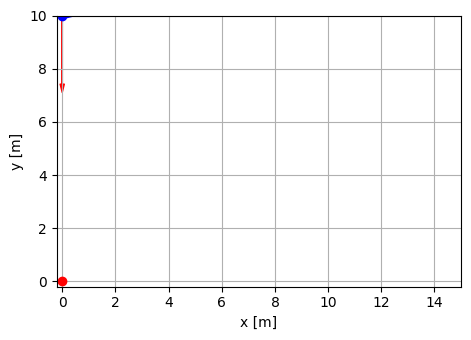

In [15]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_xlim(-0.2, 15)
ax.set_ylim(-0.2, 10)
ax.set_aspect('equal')
ax.grid()

plot, = ax.plot([], [])
hund, = ax.plot([], [], 'o', color='blue')
mensch, = ax.plot([], [], 'o', color='red')

style = mpl.patches.ArrowStyle.Simple(head_length=6, head_width=3)
arrow_v = mpl.patches.FancyArrowPatch((0,0), (0,0), color='red', arrowstyle=style)
arrow_a = mpl.patches.FancyArrowPatch((0,0), (0,0), color='blue', arrowstyle=style)

ax.add_artist(arrow_v)
ax.add_artist(arrow_a)

def update(n):
    print(n)
    print("update")
    arrow_v.set_positions(r_hund[n], r_hund[n] + v_hund[n])

    if n < a_hund.shape[0]:
        arrow_a.set_positions(r_hund[n], r_hund[n] + a_hund[n])

    hund.set_data(r_hund[n])
    mensch.set_data(r_mensch[n])

    plot.set_data(r_hund[:n + 1, 0], r_hund[:n + 1, 1])
    return hund, mensch, arrow_v, arrow_a, plot
print(t.size)
ani = mpl.animation.FuncAnimation(fig, update, interval=30, frames=t.size, blit=True)

plt.show()